In [72]:
import numpy as np
import matplotlib.pyplot as plt

Defining the optimal $\delta$ for every case. dp is $\epsilon=10^{-16}$ for computational error for double precision.

In [73]:
dp=10**-16
delta1=(45*dp)**(1/5)
delta2=((45*10**-6))**(1/5)

In [74]:
delta1,delta2

(0.001350960038520613, 0.13509600385206133)

Defining an array dd to try different $\delta$ values for 11 values of $x$ in the array x0 

In [75]:
dd=np.linspace(-5,-1,1001)
x0=np.linspace(-5,5,11)

deriv is our estimation for the first derivative for $f(x)=e^{x}$ and deriv2 is the first derivative for $f(x)=e^{0.01x}$ 

In [76]:
def deriv(x,delta):
    return (8*np.exp(x+delta)-8*np.exp(x-delta)-np.exp(x+2*delta)
            +np.exp(x-2*delta))/(12*delta)

In [77]:
def deriv2(x,delta):
    return (8*np.exp(0.01*(x+delta))-8*np.exp(0.01*(x-delta))-np.exp(0.01*(x+2*delta))
            +np.exp(0.01*(x-2*delta)))/(12*delta)

Since the actual derivative for $f(x)=e^{x}$ is $f'(x)=e^{x}$ the following plot shows the absolute error between the actual  derivative and our estimation. 

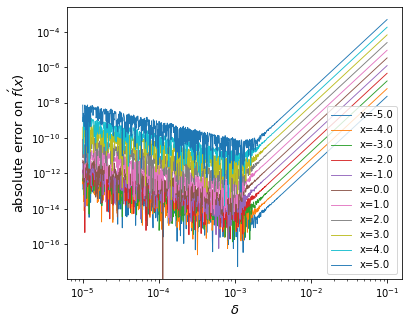

In [78]:
plt.figure(figsize=(6,5))
for i in x0:
    plt.loglog(10**dd,np.abs(np.exp(i)-deriv(i,10**dd)),'-',
               label='x='+str(i),linewidth=0.9)
plt.xlabel(r'$\delta$',fontsize=13)
plt.ylabel(r'absolute error on $f\'(x)$',fontsize=13)
plt.legend()
plt.show()

dd1 similar to dd

In [79]:
dd1=np.linspace(-5,1,1001)

$f'(x)=0.01e^{0.01x}$ for the second case.

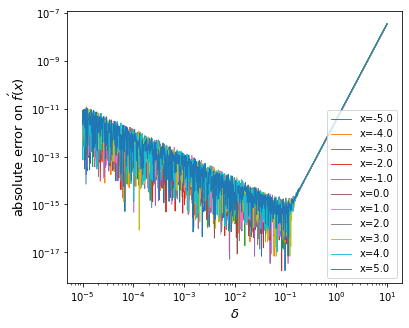

In [80]:
plt.figure(figsize=(6,5))
for i in x0:
    plt.loglog(10**dd1,np.abs(0.01*np.exp(0.01*i)-deriv2(i,10**dd1)),'-',
               label='x='+str(i),linewidth=0.9)
plt.xlabel(r'$\delta$',fontsize=13)
plt.ylabel(r'absolute error on $f\'(x)$',fontsize=13)
plt.legend()
plt.show()

We can note that the optimal $\delta$ observed on the figures are similar for the both cases, i.e., $\sim10^{-3}$ and $\sim 10^{-1}$ respectively. When $\delta$ is lower than those optimal values the error oscillates because of computational errors based on the machine precision, and for higher values the error increases with a constant slope because of errors in the numerical approximation.

I defined the ndiff routine as requested. Note that the optimal $dx$ is obtained for three different cases depending on the value of $f(x)$ and the estimation of the third derivative.

In [82]:
def ndiff(fun,x,full=False):
    dp=10**-16
    h=0.0001 #for 3rd derivative estimation and then dx and err estimation
    df3=(13*(fun(x-h)-fun(x+h))+8*(fun(x+2*h)-fun(x-2*h))
         +fun(x-3*h)-fun(x+3*h))/(8*(h**3)) #third derivative estimation
    if np.abs(fun(x))<10**-12:
        dx=(3*dp)**(1/3)
        #print(dx)
    elif np.abs(df3)<10**-12:  
        dx=np.abs(3*dp*fun(x))**(1/3) 
        #print(dx)
    else:
        dx=np.abs(3*dp*fun(x)/df3)**(1/3)
   
    err=np.abs((dp*fun(x))/dx)+(dx**2)*np.abs(df3)/3
    if full==False:
        return (fun(x+dx)-fun(x-dx))/(2*dx)
    else:
        return (fun(x+dx)-fun(x-dx))/(2*dx),dx,err

Let's test the numerical differentiator.

First case, $f(x)=x^4+x^3+x^2+3x+4$

My estimation of the derivative, optimal $dx$, and the absolute error.

In [83]:
ndiff(np.poly1d([1,1,1,3,4]),-3,True)

(-84.00000000162943, 6.414781657735258e-06, 1.8083234346740647e-09)

The actual derivative

In [84]:
np.polyval(np.poly1d([4,3,2,3]),-3) 

-84

The actual absolute error.

In [86]:
np.abs(ndiff(np.poly1d([1,1,1,3,4]),-3)
       -np.polyval(np.poly1d([4,3,2,3]),-3))

1.629430812499777e-09

Second case, $f(x)=e^{0.01x}$

In [87]:
def exp001(x):
    return np.exp(0.01*x)

My estimation of the derivative, optimal $dx$, the absolute error.

In [88]:
ndiff(exp001,1,True)

(0.01010050167075005, 0.00022183904502537719, 9.106153219949394e-13)

The actual derivative

In [89]:
0.01*np.exp(0.01*1)

0.01010050167084168

The actual absolute error

In [90]:
np.abs(0.01*np.exp(0.01*1)-ndiff(exp001,1))

9.162982872457093e-14

Third case, $f(x)=cos(x^2-1)$

In [91]:
def cospol(x):
    return np.cos((x**2)-1)

My estimation of the derivative, optimal $dx$ , and the absolute error.

In [92]:
ndiff(cospol,np.pi,True)

(-3.3118091750785004, 1.1612951097703305e-06, 1.4635538619068603e-10)

The actual derivative

In [93]:
-np.sin((np.pi**2)-1)*2*(np.pi)

-3.3118091745987295

The actual absolute error

In [94]:
np.abs(-np.sin((np.pi**2)-1)*2*(np.pi)
       -ndiff(cospol,np.pi))

4.797708896830954e-10

The ndiff routine works and can estimate an absolute error very accurately, but this estimation can vary from the actual absolute error since my estimation was made based on an approximation of the third derivative.

# Problem 3

First, I read the archive an did a plot of the temperature as function of the voltage

In [95]:
dat=np.loadtxt('lakeshore.txt')

In [96]:
v=np.array([i[1] for i in dat])
t=np.array([i[0] for i in dat])

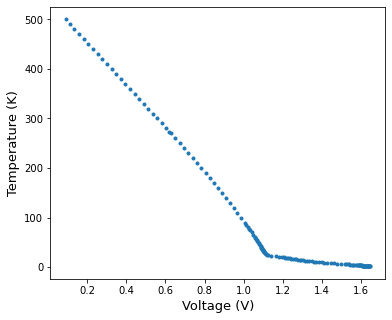

In [97]:
plt.figure(figsize=(6,5))
plt.plot(v,t,'.')
plt.xlabel(r'Voltage (V)',fontsize=13)
plt.ylabel(r'Temperature (K)',fontsize=13)
plt.show()

We can note that voltages are ordered from the highest to the lowest

In [98]:
v[0]-v[1]

0.0013000000000000789

In [99]:
v[1]-v[2]

0.0014199999999999768

In [100]:
for i in range(len(v)-1):
    if v[i]-v[i+1]<0:
        print(False)

In [102]:
#Below the lakeshore routine is defined following the description on the previous page.
def lakeshore(V,data):
    vol=np.array([i[1] for i in dat])  
    #taking the voltage and temperature from the document
    temp=np.array([i[0] for i in dat])
    v_final=[]
    err=[]
    if format(V)[0]=='[': #to identify if it is an array or not
        for j in V: #if the input is an array
            for i in range(1,len(vol)-2):
                if vol[i+1]<=j<vol[i]:
                    #third order polynomial fit
                    p3=np.polyfit(vol[i-1:i+3],temp[i-1:i+3],3) 
                    v_final.append(np.polyval(p3,j)) # V value
                    err1=np.abs(np.polyval(p3,vol[i+1])-temp[i+1])
                    err2=np.abs(np.polyval(p3,vol[i])-temp[i])
                    #estimation of the error (err1+err2)/2
                    err.append(np.mean([err1,err2]))
                
                else:
                    continue
           
            if j<vol[len(vol)-2]: #lower values using linear fit
                p1=np.polyfit(vol[len(vol)-2:len(vol)],temp[len(vol)-2:len(vol)],1)
                v_final.append(np.polyval(p1,j))
                err1=np.abs(np.polyval(p1,vol[len(vol)-2])-temp[len(vol)-2])
                err2=np.abs(np.polyval(p1,vol[len(vol)-1])-temp[len(vol)-1])
                err.append(np.mean([err1,err2]))
            elif j>=vol[1]: #larger values using linear fit
                p1=np.polyfit(vol[0:2],temp[0:2],1)
                v_final.append(np.polyval(p1,j))
                err1=np.abs(np.polyval(p1,vol[0])-temp[0])
                err2=np.abs(np.polyval(p1,vol[1])-temp[1])
                err.append(np.mean([err1,err2]))
        for k in range(len(v_final)): # turn to 0 negative outputs
            if v_final[k]<0:
                v_final[k]=0
                #estimation of the error taking the lowest temperature in the dataset
                err[k]=np.abs(0-temp[0]) 
        return np.array(v_final),np.array(err) 

    for i in range(1,len(vol)-2): #if the input is a float
        if vol[i+1]<=V<vol[i]:
            p3=np.polyfit(vol[i-1:i+3],temp[i-1:i+3],3)
            err1=np.abs(np.polyval(p3,vol[i+1])-temp[i+1])
            err2=np.abs(np.polyval(p3,vol[i])-temp[i])
            if np.polyval(p3,V)<0: # turn to 0 negative outputs
                err1=np.abs(0-temp[i+1])
                err2=np.abs(0-temp[i])
                return 0,np.mean([err1,err2])
            return np.polyval(p3,V), np.mean([err1,err2])
        else:
            continue

    if V<vol[len(vol)-2]: #lower values using linear fit
        p1=np.polyfit(vol[len(vol)-2:len(vol)],temp[len(vol)-2:len(vol)],1)
        err1=np.abs(np.polyval(p1,vol[len(vol)-2])-temp[len(vol)-2])
        err2=np.abs(np.polyval(p1,vol[len(vol)-1])-temp[len(vol)-1])
        if np.polyval(p1,V)<0: # turn to 0 negative outputs
            err1=np.abs(0-temp[len(vol)-2])
            err2=np.abs(0-temp[len(vol)-1])
            return 0,np.mean([err1,err2]) 
        return np.polyval(p1,V),np.mean([err1,err2])
    
    elif V>=vol[1]: #larger values using linear fit
        p1=np.polyfit(vol[0:2],temp[0:2],1)
        err1=np.abs(np.polyval(p1,vol[0])-temp[0])
        err2=np.abs(np.polyval(p1,vol[1])-temp[1])
        if np.polyval(p1,V)<0: # turn to 0 negative outputs
            err1=np.abs(0-temp[0])
            return 0,np.mean([err1])
        return np.polyval(p1,V),np.mean([err1,err2])

Let's test the routine. First, for a float $V=1.3V$

In [103]:
lakeshore(1.3,dat)

(13.702570519806386, 2.8421709430404007e-13)

Now using an array of values $V\in[0.001,1.7]V$

In [104]:
v1=np.linspace(0.001,1.7,10001)

predv will be our interpolation and err our error estimation.

In [105]:
predv,err=lakeshore(v1,dat)

A plot to compare our interpolation with the data points.

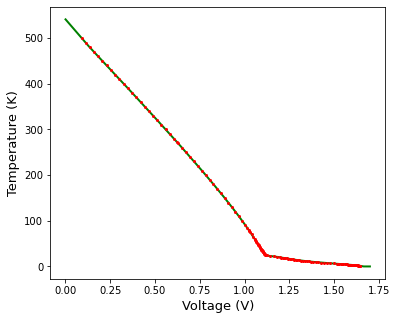

In [106]:
plt.figure(figsize=(6,5))
plt.plot(v1,predv,'-',color='green',linewidth=2)
plt.plot(v,t,'.',color='red',markersize=4)
plt.xlabel(r'Voltage (V)',fontsize=13)
plt.ylabel(r'Temperature (K)',fontsize=13)
plt.show()

It seems that the interpolation agrees pretty well with the data points. Now let's see the estimated error.

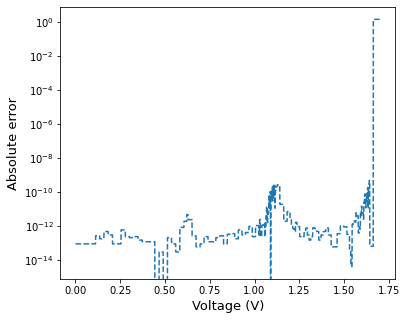

In [107]:
plt.figure(figsize=(6,5))
plt.plot(v1,err,'--')
plt.yscale('log')
plt.xlabel(r'Voltage (V)',fontsize=13)
plt.ylabel(r'Absolute error',fontsize=13)
plt.show()

The error seems to have a mean value of about $\sim10^{-13}-10^{12}$. This error should become constant if we pick values larger enough than vol[0], because at some point the linear fit of the border becomes a negative value and the routine turn the extrapolated (and not interpolated in this especific case) temperature to 0. At that point the error becomes very large and the routine cannot give a good approximation.

# Problem 4

First, we must define the numerator a denominator order for the rational fit because we will need n+m+1 data points to solve the coefficients. In especific, we will consider a rational fit of the form $f(x)\approx \frac{P(x)}{1+Q(x)}$ and the amount of coefficients must be =length of data=n+m+1 to have a square matrix and can do the inverse.

In [108]:
from scipy import interpolate as interp

In [109]:
nc=5 #numerator order
mc=6 #denominator order

(xc,yc) are the points to do an interpolation of $cos(x)$

In [110]:
xc=np.linspace(-np.pi/2,np.pi/2,nc+mc+1)
yc=np.cos(xc)

(xx,yy) are the points to evaluate the interpolations.

In [111]:
xx=np.linspace(-np.pi/2,np.pi/2,1001)
yy=np.cos(xx)

For the polynomial fit we set an (n+m)th grade polynomial

In [112]:
polyc=np.polyfit(xc,yc,nc+mc)
ypoly=np.polyval(polyc,xx)

The splines interpolation makes a cubic polynomial fit for every point and set the second derivatives to be continuous. I just used the spl interpolation from scipy.

In [113]:
spl=interp.splrep(xc,yc)
yspl=interp.splev(xx,spl)

I defined the routine ratfit to make the rational interpolation and ratev to evaluate it.

In [114]:
def ratfit(x,y,n,m):
    #polynomial evaluation of the points for the numerator
    pcols=[x**k for k in range(n+1)] 
    pmat=np.vstack(pcols)

    #polynomial evaluaion of the points for the denominator
    qcols=[-x**k*y for k in range(1,m+1)] 
    qmat=np.vstack(qcols)
    mat=np.hstack([pmat.T,qmat.T]) #matrix
    
    coeffs=np.linalg.inv(mat)@y #solving the coefficients
    
    pc=coeffs[:n+1]
    qc=coeffs[n+1:]
    
    return pc,qc

In [115]:
def ratev(x,p,q):
    pp=0
    for i in range(len(p)):
        pp+=p[i]*(x**i)
    qq=1
    for i in range(len(q)):
        qq+=q[i]*(x**(i+1))
    return pp/qq

In [116]:
pc,qc=ratfit(xc,yc,nc,mc)
yrat=ratev(xx,pc,qc)

In [117]:
pc,qc

(array([ 1.00000001e+00, -1.11758709e-08, -4.52230319e-01,  3.72529030e-09,
         1.90263290e-02, -1.74622983e-10]),
 array([-7.45058060e-09,  4.77696838e-02, -2.32830644e-10,  1.24447502e-03,
        -3.63797881e-12,  2.08040366e-05]))

Some coefficients are very close to 0.

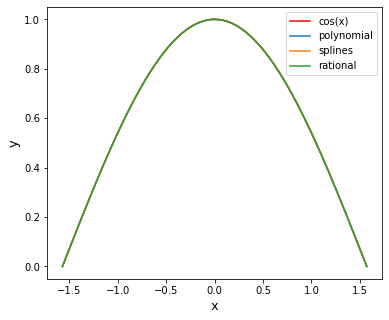

In [118]:
plt.figure(figsize=(6,5))
plt.plot(xx,yy,label='cos(x)', color='red')
plt.plot(xx,ypoly,label='polynomial')
plt.plot(xx,yspl,label='splines')
plt.plot(xx,yrat,label='rational')
plt.xlabel(r'x',fontsize=13)
plt.ylabel(r'y',fontsize=13)
plt.legend()
plt.show()

All the interpolations are very similar to the function. Let's see the absolute error.

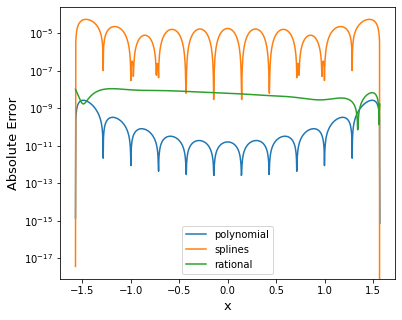

In [119]:
plt.figure(figsize=(6,5))
plt.plot(xx,np.abs(ypoly-yy),label='polynomial')
plt.plot(xx,np.abs(yspl-yy),label='splines')
plt.plot(xx,np.abs(yrat-yy),label='rational')
plt.yscale('log')
plt.xlabel(r'x',fontsize=13)
plt.ylabel(r'Absolute Error',fontsize=13)
plt.legend()
plt.show()

The error in the rational fit is almost constant, while it oscillates for the splines and polynomial

Now I tried the same for $\frac{1}{1+x^{2}}$

In [120]:
nl=2
ml=3

In [121]:
xl=np.linspace(-1,1,nl+ml+1)
yl=1/(1+xl**2)

In [122]:
xx2=np.linspace(-1,1,1001)
yy2=1/(1+xx2**2)

In [123]:
polyl=np.polyfit(xl,yl,nl+ml)
ypolyl=np.polyval(polyl,xx2)

In [124]:
spll=interp.splrep(xl,yl)
yspll=interp.splev(xx,spl)

In [125]:
pl,ql=ratfit(xl,yl,nl,ml)
yratl=ratev(xx2,pl,ql)

In [126]:
pl,ql

(array([1.92307692, 4.        , 0.02776841]), array([3., 1., 3.]))

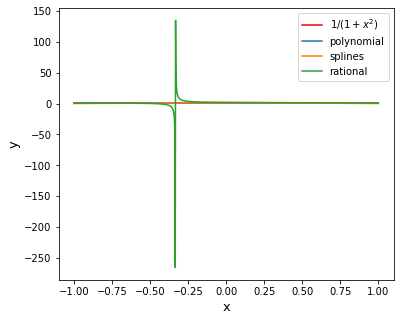

In [127]:
plt.figure(figsize=(6,5))
plt.plot(xx2,yy2,color='red',label='$1/(1+x^{2})$')
plt.plot(xx2,ypolyl,label='polynomial')
plt.plot(xx2,yspll,label='splines')
plt.plot(xx2,yratl,label='rational')
plt.xlabel(r'x',fontsize=13)
plt.ylabel(r'y',fontsize=13)
plt.legend()
plt.show()

It seems like the rational fit is not very well because of some points are very out of the distribution when doing the interpolation. So we will take the rational interpolation out of the plot.

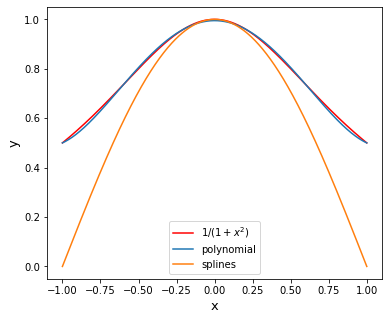

In [128]:
plt.figure(figsize=(6,5))
plt.plot(xx2,yy2,color='red',label='$1/(1+x^{2})$')
plt.plot(xx2,ypolyl,label='polynomial')
plt.plot(xx2,yspll,label='splines')
plt.xlabel(r'x',fontsize=13)
plt.ylabel(r'y',fontsize=13)
plt.legend()
plt.show()

The polynomial fit is the best case. Let's see the errors.

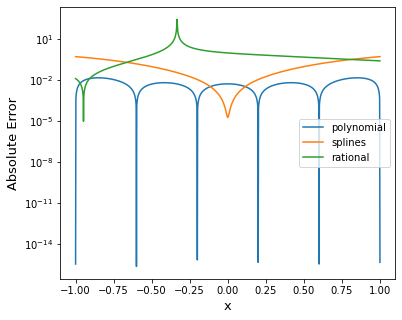

In [129]:
plt.figure(figsize=(6,5))
plt.plot(xx2,np.abs(ypolyl-yy2),label='polynomial')
plt.plot(xx2,np.abs(yspll-yy2),label='splines')
plt.plot(xx2,np.abs(yratl-yy2),label='rational')
plt.yscale('log')
plt.xlabel(r'x',fontsize=13)
plt.ylabel(r'Absolute Error',fontsize=13)
plt.legend()
plt.show()

Now I tried a rational fit with n=4 and m=5

In [130]:
nll=4
mll=5

In [131]:
xll=np.linspace(-1,1,nll+mll+1)
yll=1/(1+xll**2)

In [132]:
pll,qll=ratfit(xll,yll,nll,mll)
yratll=ratev(xx2,pll,qll)

In [133]:
pll,qll

(array([-1.15426343, -2.        ,  2.        ,  1.5       , -0.16231439]),
 array([0.  , 3.  , 1.  , 1.5 , 0.75]))

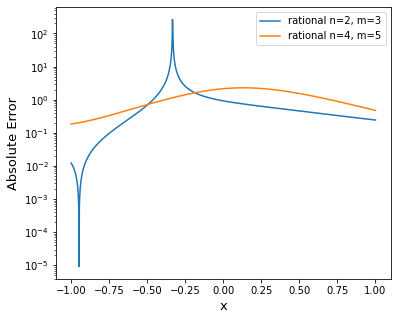

In [134]:
plt.figure(figsize=(6,5))
plt.plot(xx2,np.abs(yratl-yy2),label='rational n=2, m=3')
plt.plot(xx2,np.abs(yratll-yy2),label='rational n=4, m=5')
plt.yscale('log')
plt.xlabel(r'x',fontsize=13)
plt.ylabel(r'Absolute Error',fontsize=13)
plt.legend()
plt.show()

It seems like the error is less than before at some points but is not enough because is still $\sim 1$. Then, changing linalg.inv to linalg.pinv this error could be reduced because linalg.pinv uses the pseudo-inverse of the matrix, and then it will work even when a row becomes near to 0. 

In [135]:
def ratfit2(x,y,n,m):
    pcols=[x**k for k in range(n+1)]
    pmat=np.vstack(pcols)

    qcols=[-x**k*y for k in range(1,m+1)]
    qmat=np.vstack(qcols)
    mat=np.hstack([pmat.T,qmat.T])
    
    coeffs=np.linalg.pinv(mat)@y
    
    pc=coeffs[:n+1]
    qc=coeffs[n+1:]
    
    return pc,qc

In [136]:
plk,qlk=ratfit2(xll,yll,nll,mll)
yratlk=ratev(xx2,plk,qlk)

In [137]:
pll,qll

(array([-1.15426343, -2.        ,  2.        ,  1.5       , -0.16231439]),
 array([0.  , 3.  , 1.  , 1.5 , 0.75]))

In [138]:
plk,qlk

(array([ 1.00000000e+00,  1.99840144e-15, -3.33333333e-01,  6.66133815e-16,
        -3.55271368e-15]),
 array([ 3.10862447e-15,  6.66666667e-01, -1.33226763e-15, -3.33333333e-01,
         2.66453526e-15]))

We can note that in the case using linalg.ing some coefficients are overestimated, but with linalg.pinv just a few coeffiecients are large enough and the others are $\sim 0$. Let's see the error.

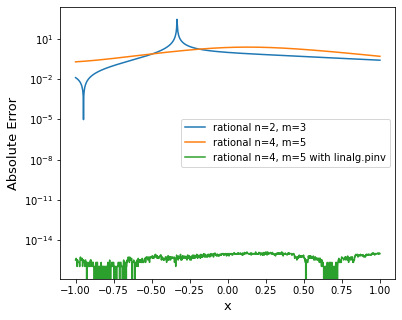

In [139]:
plt.figure(figsize=(6,5))
plt.plot(xx2,np.abs(yratl-yy2),label='rational n=2, m=3')
plt.plot(xx2,np.abs(yratll-yy2),label='rational n=4, m=5')
plt.plot(xx2,np.abs(yratlk-yy2),label='rational n=4, m=5 with linalg.pinv')
plt.yscale('log')
plt.xlabel(r'x',fontsize=13)
plt.ylabel(r'Absolute Error',fontsize=13)
plt.legend()
plt.show()

We can note that using linal.pinv the error in the interpolation is reduced to $<10^{-14}$

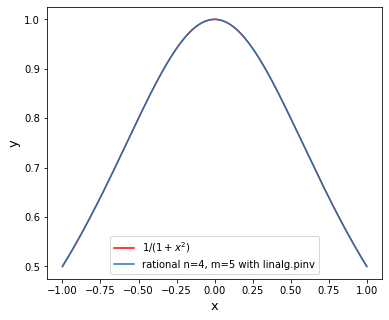

In [140]:
plt.figure(figsize=(6,5))
plt.plot(xx2,yy2,color='red',label='$1/(1+x^{2})$')
plt.plot(xx2,yratlk,label='rational n=4, m=5 with linalg.pinv')
plt.xlabel(r'x',fontsize=13)
plt.ylabel(r'y',fontsize=13)
plt.legend()
plt.show()